## Example for ImArray
ImArray is a software to image an object in the sky by an array of ground Telescopes
Copyright (C) 2016  Thomas Vuillaume

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>

The author may be contacted @
thomas.vuillaume@lapp.in2p3.fr

Let's start with some imports

In [1]:
import geometry as geo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
import time
import math
import object as obj
import CameraImage as ci
import Hillas as hillas
import os
import vizualisation as viz
from importlib import reload

In [2]:
%matplotlib inline

In [159]:
reload(geo)
reload(obj)
reload(ci)

<module 'CameraImage' from '/Users/thomasvuillaume/Work/Dev/pschitt/pschitt/CameraImage.py'>

We can define some shower parameters:

In [160]:
shower = obj.shower()

shower.impact_point = np.array([80,60,0])

#shower direction
shower.alt = math.radians(22)
shower.az = math.radians(90)

#pointing direction
talt = math.radians(20)
taz = math.radians(90)

#shower parameters
shower_top = 12000
shower_length = 6000
shower_width = 100

shower.number_of_particles = int(1e4)

Here, our shower is a geometrical object (an ellpisoid in this case) randomly filled with points:

In [161]:
reload(obj)
reload(geo)

<module 'geometry' from '/Users/thomasvuillaume/Work/Dev/pschitt/pschitt/geometry.py'>

In [162]:
# shower = obj.random_ellipsoide(shower_top, shower_length, shower_width, shower.alt, shower.az, shower.impact_point, shower.number_of_particles)
# shower.random_ellipsoide(shower_top, shower_length, shower_width)
# shower.array = obj.Get_pos_Gaisser_Hillas(shower.number_of_particles, shower.alt, shower.az, shower.impact_point)
# shower.shower_rot(shower.alt, shower.az)
# shower.linear_segment(np.array([200,0,12000]), np.array([40,0,4000]))
shower.gaussian_ellipsoide_alongz([0, 0, (shower_top-6000)/2.], shower_length, shower_width)

In [163]:
shower.gaussian_ellipsoide(8000, shower_length, shower_width)

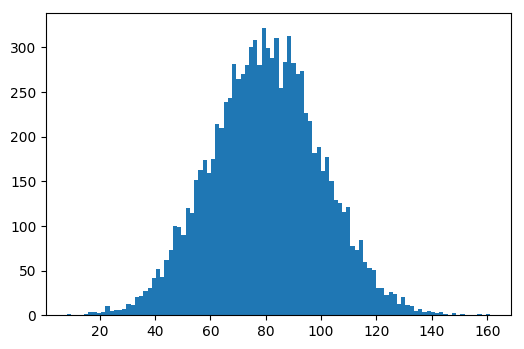

In [164]:
plt.hist(shower.array[:,0], bins=100);

In [165]:
# shower.array = obj.Get_pos_Gaisser_Hillas(10000, shower.alt, shower.az, shower.impact_point)
# shower.shower_rot(np.radians(80), np.radians(0))
# shower.array += shower.impact_point
# plt.scatter(shower.array[:,0],shower.array[:,2], color='red')
# plt.scatter(shower.array[:,1],shower.array[:,2])

Let's now define a telescopes array configuration:

In [166]:
tel_normal = geo.altaz_to_normal(talt,taz)
# tel_normal = geo.altaz_to_normal(np.radians(89),0)
# alltel[0].pointing_object([200,0,12000])
# tel_normal = alltel[0].normal

In [167]:
tel1 = geo.Telescope([500,100,-100],tel_normal,0)
tel2 = geo.Telescope([-10,300,100],tel_normal,0)
tel3 = geo.Telescope([-500,400,10],tel_normal,0)
tel4 = geo.Telescope([-350,-500,0],tel_normal,0)
tel5 = geo.Telescope([600,-100,150],tel_normal,0)
tel6 = geo.Telescope([0,200,0],tel_normal,0)
tel7 = geo.Telescope([80,0,0],tel_normal,0)
tel8 = geo.Telescope([-80,0,0],tel_normal,0)
tel9 = geo.Telescope([0,-80,0],tel_normal,0)
tel10 = geo.Telescope([0,80,0],tel_normal,0)
tel11 = geo.Telescope([0,80,0], geo.altaz_to_normal(20,180) ,0)

alltel = [tel1, tel2, tel3, tel4, tel5, tel6, tel11]

In [168]:
tel1 = geo.Telescope([0,100,0],tel_normal,0)
tel2 = geo.Telescope([0,-100,0],tel_normal,0)
tel3 = geo.Telescope([100,0,0],tel_normal,0)
tel4 = geo.Telescope([-100,0,0],tel_normal,0)
tel5 = geo.Telescope([400,400,0],tel_normal,0)
tel6 = geo.Telescope([-400,400,0],tel_normal,0)
tel7 = geo.Telescope([400,-400,0],tel_normal,0)
tel8 = geo.Telescope([-400,-400,0],tel_normal,0)

alltel = [tel1, tel2, tel3, tel4, tel5, tel6, tel7, tel8]

In [169]:
print(talt, taz)

0.3490658503988659 1.5707963267948966


In [170]:
geo.normal_to_altaz(tel1.normal)

(0.3490658503988659, 1.5707963267948966)

In [171]:
print(tel1.camera_center)
print(tel1.mirror_center)
np.sqrt(((tel1.mirror_center - tel1.camera_center)**2).sum())

[  9.20633248e-16   1.15035082e+02   5.47232229e+00]
[  0 100   0]


16.000000000000007

In [172]:
geo.barycenter_in_R(tel1, 0, 0)

array([  9.20633248e-16,   1.15035082e+02,   5.47232229e+00])

The telecopes positions can also be load from a data file with:

In [173]:
# CTA South site:
# alltel = geo.load_telescopes("data/3HB1-NG-tels.txt")
# HESS 1 site:
alltel = geo.load_telescopes("data/hess1_site.txt")
tab = alltel[0].pixel_tab
print(len(tab), "pixels cameras")
for tel in alltel:
    tel.pixel_tab = tab
    tel.normal = tel_normal

4  telescopes loaded
1855 pixels cameras


In [174]:
shower.impact_point

array([80, 60,  0])

We can check that no pair of telescopes are set at the same location:

In [175]:
geo.telescopes_unicity(alltel)

True

Let's vizualise what we have done so far:

/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


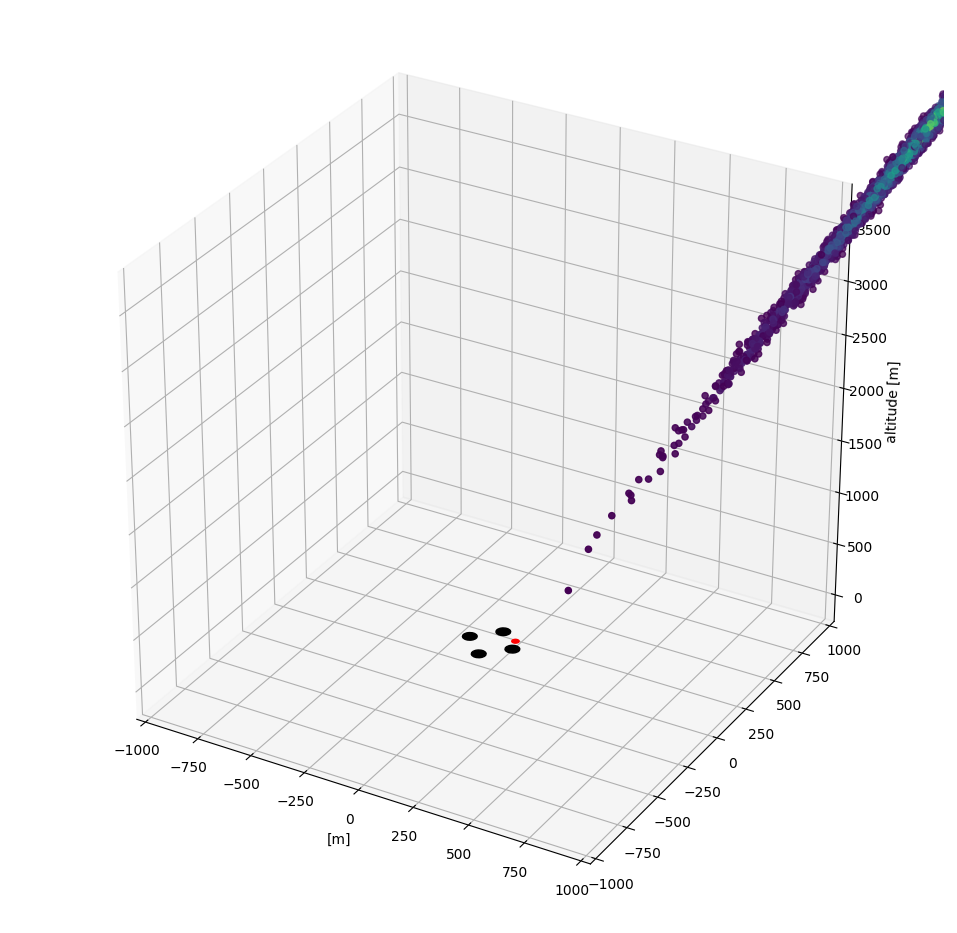

In [177]:
reload(viz)
viz.plot_shower3d(shower, alltel, density_color=True)
# plt.savefig("../Images/shower3D.pdf")

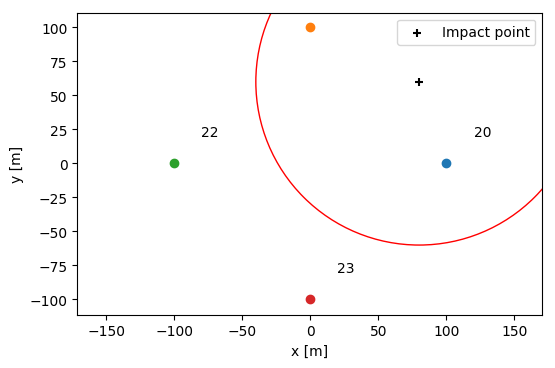

In [178]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")

cherenkov_circle = plt.Circle((shower.impact_point[0], shower.impact_point[1]), 120, color='r', fill = False)
ax.add_artist(cherenkov_circle)

viz.plot_array(alltel)
plt.savefig("../Images/impact.pdf")

In [179]:
from importlib import reload
import emission as emi
reload(ci)
reload(geo)
reload(hillas)
reload(emi)

<module 'emission' from '/Users/thomasvuillaume/Work/Dev/pschitt/pschitt/emission.py'>

In [180]:
trigger_intensity = 200.
noise = 0

In [181]:
ci.array_shower_imaging(shower, alltel, noise)

One can vizualise a telescope camera image:

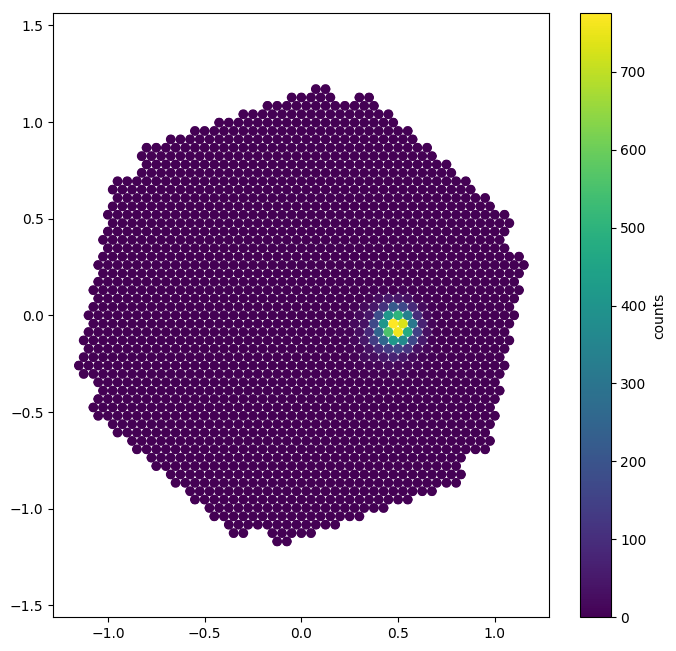

In [182]:
# %matplotlib qt4
tel0 = alltel[0]
plt.figure(figsize=(8,8))
viz.display_camera_image(tel0)
plt.scatter(tel0.pixel_tab[:,0], tel0.pixel_tab[:,1], c=tel0.signal_hist, marker='H')
plt.show()
# plt.show()
# tel0.signal_hist -= tel0.signal_hist.mean()
# viz.display_camera_image(tel0)
# tel0.signal_hist.mean()

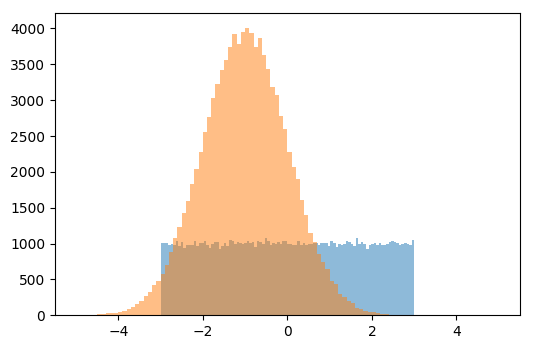

In [183]:
gau = np.random.normal(-1,1,100000)
nr = np.random.random_sample(100000) * 6 - 3
plt.hist(nr, alpha=0.5, bins=100, range=(-3,3));
plt.hist(gau, alpha=0.5, bins=100, range=(-5,5));

We can now make two Hillas reconstruction:

Number of triggered telescopes =  4


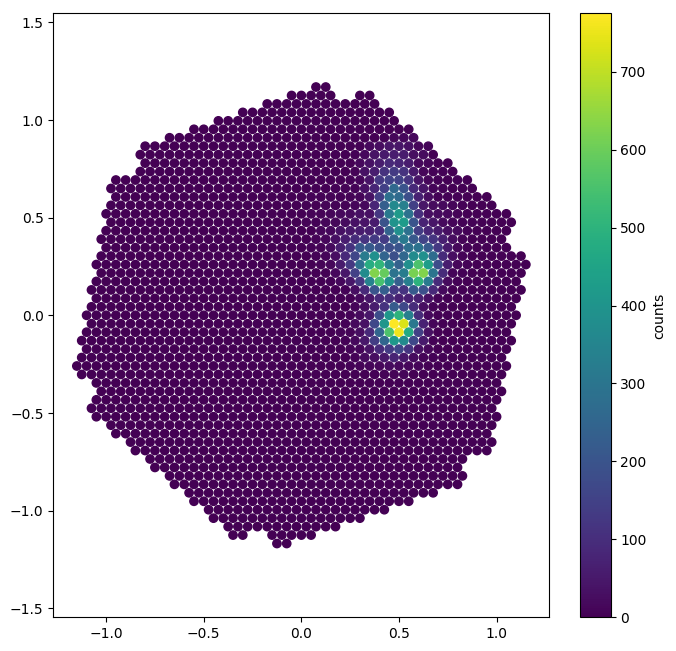

In [186]:
# Compute all the Hillas parameters
plt.figure(figsize=(8,8))
HP, triggered_telescopes = hillas.array_hillas_parameters(alltel, trigger_intensity)
print("Number of triggered telescopes = ", len(triggered_telescopes))

viz.display_stacked_cameras(triggered_telescopes)

if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

And compare the results:

In [223]:
type(pa)

list

In [228]:
if len(triggered_telescopes)>1:
    print("Real impact parameter : ", shower.impact_point)
    print("Reconstruction with simple average = {0} \tError = {1:.1f}".format(pa, math.sqrt(((shower.impact_point-pa)**2).sum()), prec='.1'))
    print("Reconstruction with ponderation and cut = %s \tError = %.2fm" % (p, math.sqrt(((shower.impact_point-p)**2).sum())))

Real impact parameter :  [80 60  0]
Reconstruction with simple average = [430.97802630560676, 33.146878475025972, 0.0] 	Error = 352.0
Reconstruction with ponderation and cut = [251.80754653101931, -34.202246949831917, 0.0] 	Error = 195.94m


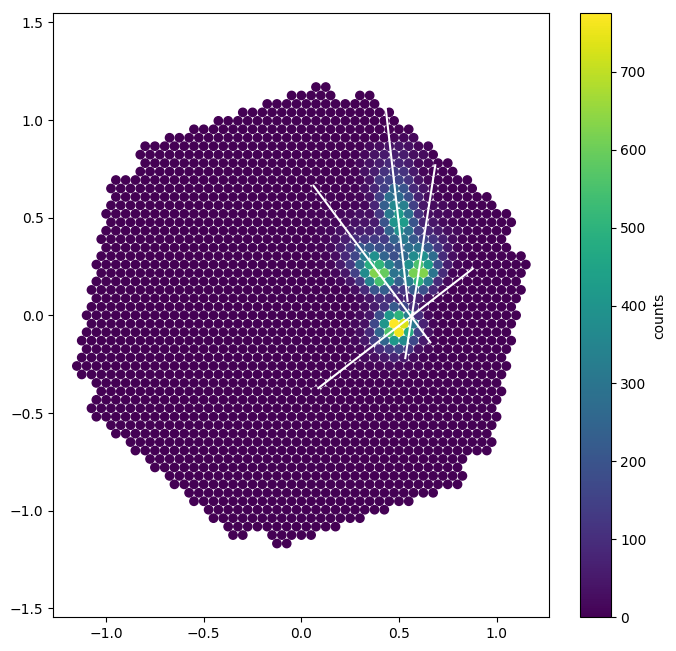

In [188]:
plt.figure(figsize=(8,8))
viz.display_stacked_cameras(alltel)
x = np.linspace(-0.5, 0.5)
for tel, hp in zip(triggered_telescopes, HP):
    plt.plot(hp[1] + x*np.cos(hp[7] + math.pi/2.), hp[2] + x*np.sin(hp[7] + math.pi/2.), color="white")
    plt.axis('equal')
plt.savefig("../Images/hillasreco.pdf")

In [189]:
hp

[9938.0,
 0.3618333668746227,
 0.26217087442141274,
 0.15300903971474844,
 0.096654586722342492,
 0.4468298924408633,
 0.62702133871819787,
 0.6409154031461459,
 0.44678676399050588]

4
20
[9998.0, 0.48222894578915781, -0.067419672934586908, 0.1097371128012916, 0.10137291411273962, 0.48691905739612323, -0.1389080514197221, 2.22878055561179, 0.34823840441689552]


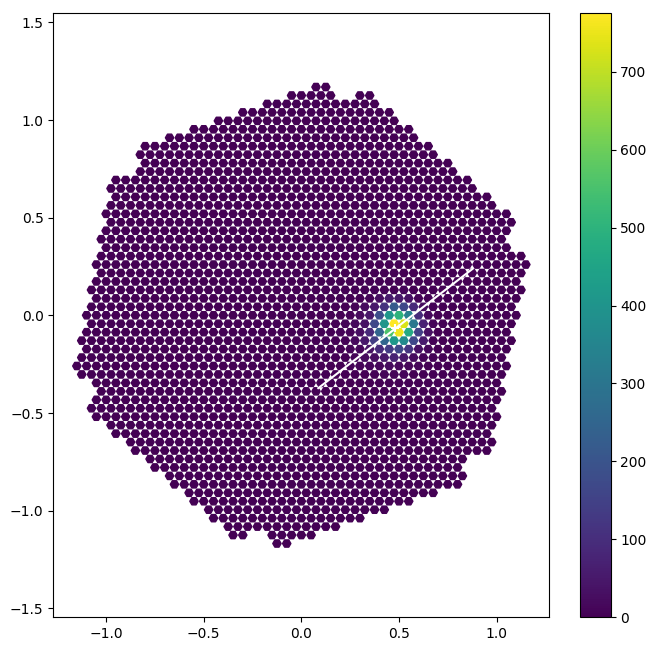

21
[9972.0, 0.60905535499398311, 0.27453819695146409, 0.15000982365154394, 0.10226323107225378, 0.66807158825398916, 0.42348631583509877, 2.9872895237484602, 0.5596248914706563]


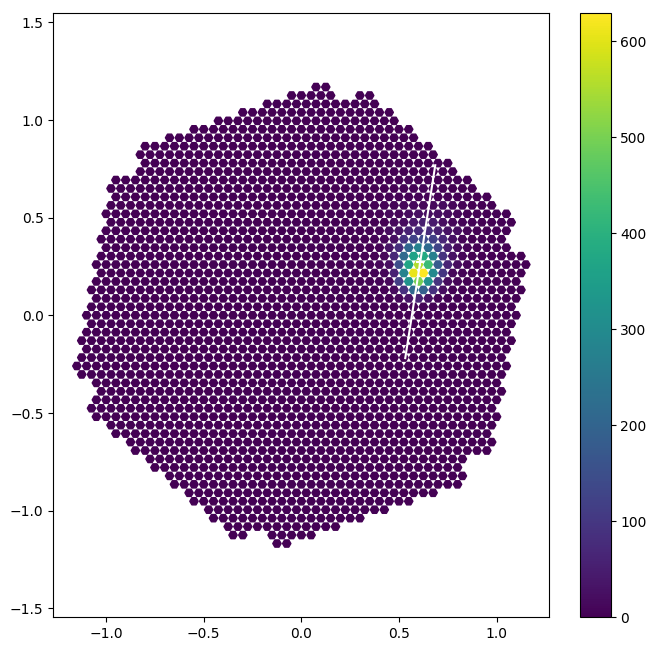

22
[9272.0, 0.48780737704918042, 0.57048237165660043, 0.18311073309439518, 0.092233733765851922, 0.75060387254166283, 0.86336114189689228, 3.2545127010035024, 0.54898276316441141]


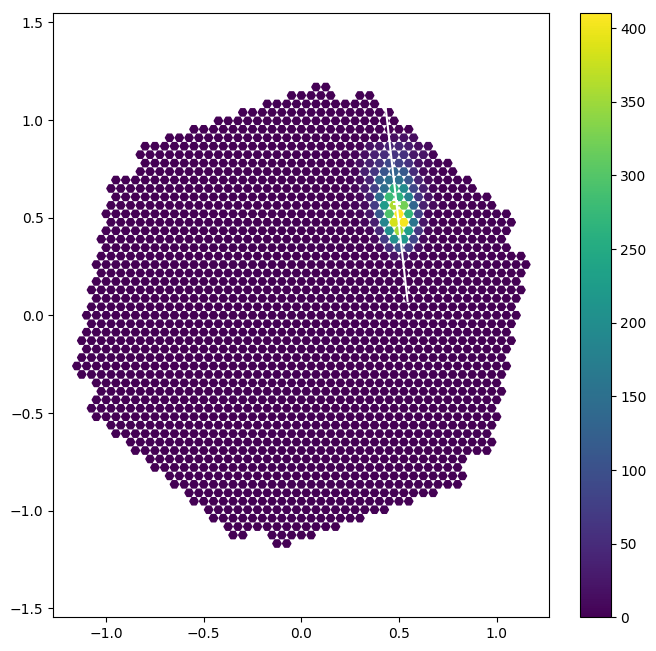

23
[9938.0, 0.3618333668746227, 0.26217087442141274, 0.15300903971474844, 0.096654586722342492, 0.4468298924408633, 0.62702133871819787, 0.6409154031461459, 0.44678676399050588]


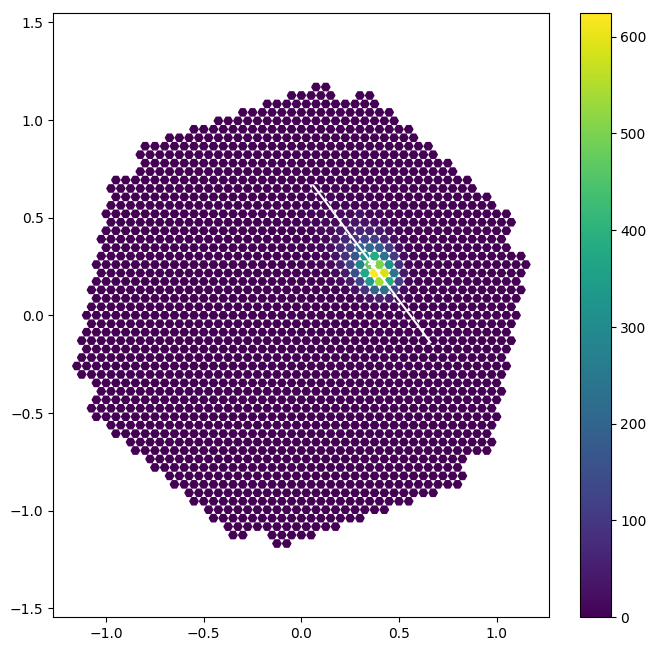

In [190]:
print(len(triggered_telescopes))
x = np.linspace(-0.5, 0.5)
for tel, hp in zip(triggered_telescopes[:20], HP[:20]):
    print(tel.id)
    plt.figure(figsize=(8,8))
    plt.scatter(tel.pixel_tab[:,0], tel.pixel_tab[:,1], c=tel.signal_hist, marker='H')
    plt.colorbar()
    print(hp)
    plt.plot(hp[1] + x*np.cos(hp[7]+math.pi/2.), hp[2] + x*np.sin(hp[7]+math.pi/2.), color="white")
    plt.scatter(hp[1] , hp[2], color="white", marker='+', linewidths=3)
    plt.axis('equal')
    plt.show()

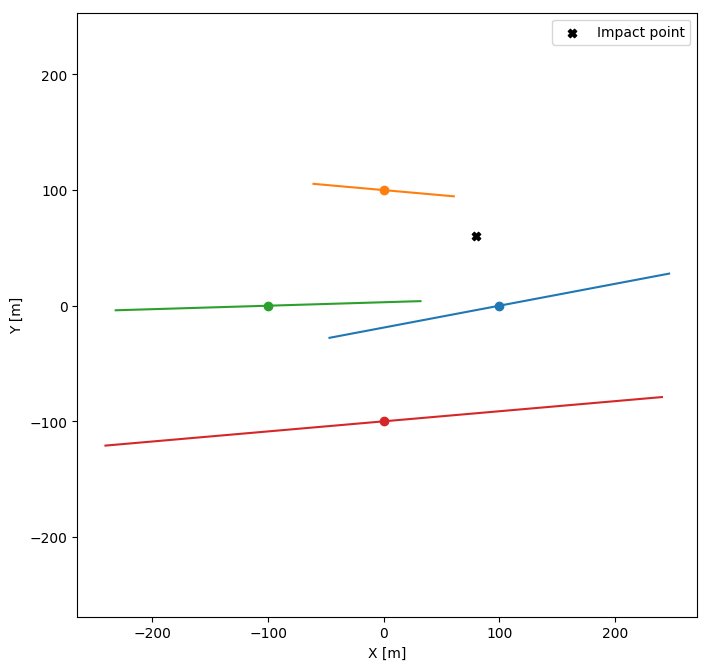

In [194]:
# viz.plot_array(triggered_telescopes)
x = np.linspace(-300,300)
HP = np.array(HP)
# for (hp,tel) in zip(HP, triggered_telescopes):
hp = HP[0]
plt.figure(figsize=(8,8))

plt.axis('equal')
plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker='X')
for tel in triggered_telescopes:
    plt.scatter(tel.mirror_center[0], tel.mirror_center[1])
    
for (tel, hp) in zip(triggered_telescopes, HP):
    alt = talt
    az = taz
    psi = hp[7] + np.pi/2.
    n = [
    np.sin(alt)**2 * np.cos(az) * np.cos(psi) - np.sin(alt)*np.sin(az) * np.sin(psi) + np.cos(alt)**2 * np.sin(az)*np.cos(psi),
    np.sin(alt)**2 * np.sin(az) * np.cos(psi) + np.sin(alt)*np.cos(az) * np.sin(psi) - np.cos(alt)**2 * np.cos(az)*np.cos(psi)
    ]
    plt.plot(x*n[0] + tel.mirror_center[0], x*n[1] + tel.mirror_center[1]);


plt.axis('equal')
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
#plt.savefig("../Images/hillasreco_site.pdf")

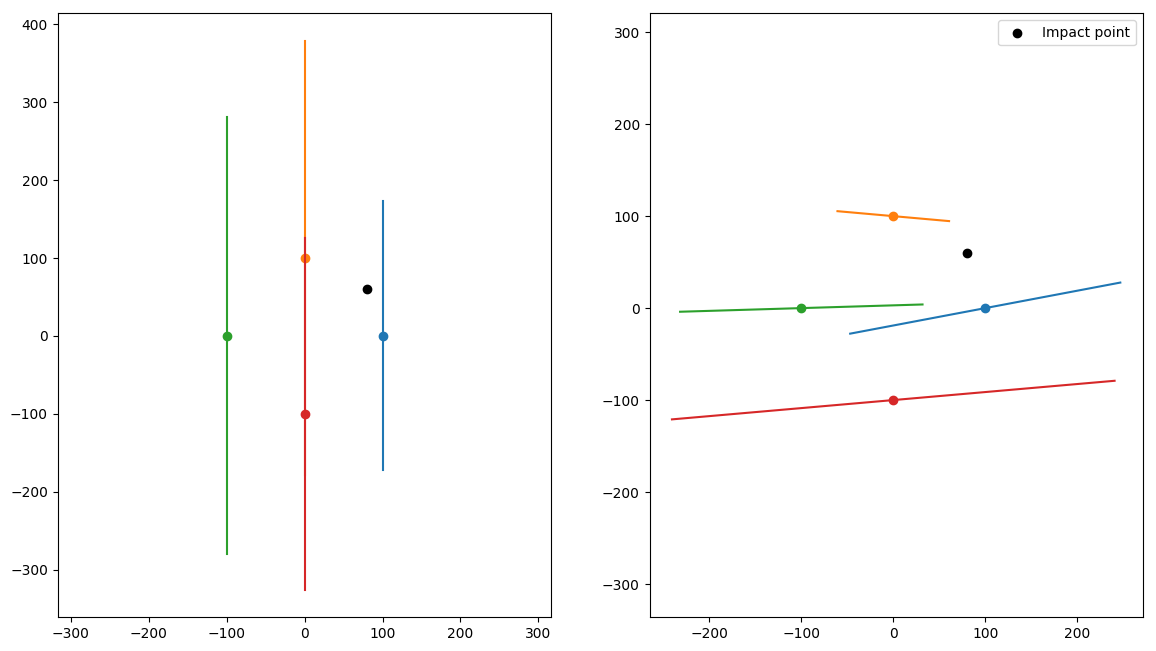

In [197]:
# viz.plot_array(triggered_telescopes)
x = np.linspace(-300,300)
HP = np.array(HP)
# for (hp,tel) in zip(HP, triggered_telescopes):
hp = HP[0]
plt.figure(figsize=(14,8))

plt.subplot(121)
plt.axis('equal')
plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point')
for tel in triggered_telescopes:
    plt.scatter(tel.mirror_center[0], tel.mirror_center[1])

plt.subplot(122)
plt.axis('equal')
plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point')
for tel in triggered_telescopes:
    plt.scatter(tel.mirror_center[0], tel.mirror_center[1])    
    
for (tel, hp) in zip(triggered_telescopes, HP):
    alt = talt
    az = taz
    psi = hp[7] + np.pi/2.
    n = [
    np.sin(alt)**2 * np.cos(az) * np.cos(psi) - np.sin(alt)*np.sin(az) * np.sin(psi) + np.cos(alt)**2 * np.sin(az)*np.cos(psi),
    np.sin(alt)**2 * np.sin(az) * np.cos(psi) + np.sin(alt)*np.cos(az) * np.sin(psi) - np.cos(alt)**2 * np.cos(az)*np.cos(psi)
    ]
    plt.subplot(121)
    plt.plot(x*np.cos(hp[7]+math.pi/2.)*np.cos(talt)*np.cos(taz) + tel.mirror_center[0], x*np.sin(hp[7]+math.pi/2.)*np.cos(talt)*np.sin(taz) + tel.mirror_center[1]);
    plt.subplot(122)
    plt.plot(x*n[0] + tel.mirror_center[0], x*n[1] + tel.mirror_center[1]);


plt.axis('equal')
plt.legend()

In [198]:
# for hp in HP:
#     print(np.cos(hp[6]))
# for tel in alltel:
#     if tel.signal_hist.sum() > trigger_intensity:
#         viz.display_camera_image(tel)
#         plt.show()

In [199]:
X = []
Y = []
for i1 in np.arange(len(HP)-1):
    for i2 in np.arange(i1+1, len(HP)):
        tel1 = triggered_telescopes[i1]
        tel2 = triggered_telescopes[i2]
        hp1 = HP[i1]
        hp2 = HP[i2]
#for tel1, hp1 in zip(triggered_telescopes, HP):
#    for tel2, hp2 in zip(triggered_telescopes, HP):
#         if not tel1==tel2:
# tel1 = triggered_telescopes[0]
# tel2 = triggered_telescopes[1]
#             hp1 = HP[0]
#             hp2 = HP[1]
        gx1 = hp1[1]
        gy1 = hp1[2]
        phi1 = hp1[6]
        psi1 = hp1[7] + math.pi/2.
        gx2 = hp2[1]
        gy2 = hp2[2]
        phi2 = hp2[6]
        psi2 = hp2[7] + math.pi/2.
        A = np.array([[np.tan(phi1), -1], [np.tan(phi2), -1]])
        B = np.array([(tel1.mirror_center[0] + gx1)*np.tan(psi1) - (tel1.mirror_center[1] + gy1), (tel2.mirror_center[0] + gx2) * np.tan(psi2) - (tel2.mirror_center[1] + gy2) ])
        res = np.linalg.solve(A,B)
        X.append(res[0])
        Y.append(res[1])
            # print(tel1.id, tel2.id, res)
print(shower.impact_point)
reco = np.array([np.mean(X), np.mean(Y), 0])
print(reco)
print(np.linalg.norm(reco-shower.impact_point))

[80 60  0]
[ 692.85204631  335.26938691    0.        ]
671.833957188


In [200]:
reload(ci)

<module 'CameraImage' from '/Users/thomasvuillaume/Work/Dev/pschitt/pschitt/CameraImage.py'>

In [203]:
ci.array_shower_imaging(shower, alltel, noise)

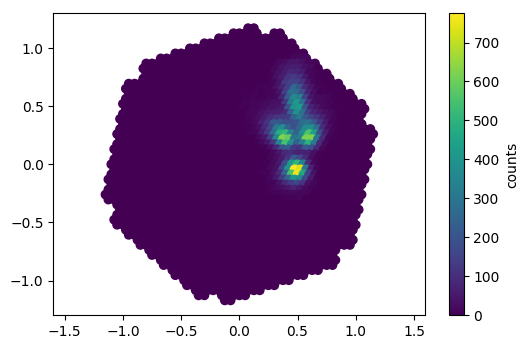

In [204]:
viz.display_stacked_cameras(alltel)

4


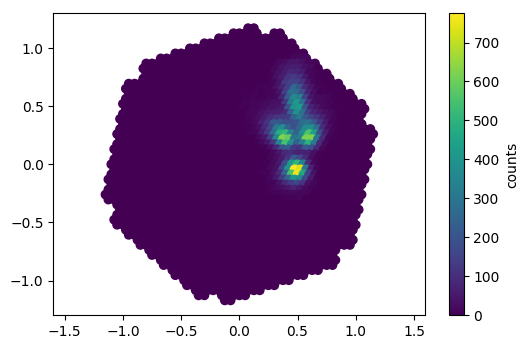

In [206]:
# Compute all the Hillas parameters
HP, triggered_telescopes = hillas.array_hillas_parameters(alltel, trigger_intensity)
print(len(triggered_telescopes))

viz.display_stacked_cameras(triggered_telescopes)

pa = hillas.impact_parameter_average(triggered_telescopes, HP)
p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

In [207]:
print("Real impact parameter : ", shower.impact_point)
print("Reconstruction with simple average = %s \tError = %.2fm" % (pa, math.sqrt(((shower.impact_point-pa)**2).sum())))
print("Reconstruction with ponderation and cut = %s \tError = %.2fm" % (p, math.sqrt(((shower.impact_point-p)**2).sum())))

Real impact parameter :  [80 60  0]
Reconstruction with simple average = [430.97802630560676, 33.146878475025972, 0.0] 	Error = 352.00m
Reconstruction with ponderation and cut = [251.80754653101931, -34.202246949831917, 0.0] 	Error = 195.94m


In [92]:
# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [93]:
%matplotlib inline

In [94]:
def rot_plot(alt, az):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    x = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="k")
    y = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="k")
    z = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="k")
    ax.add_artist(x)
    ax.add_artist(y)
    ax.add_artist(z)

    x1 = Arrow3D([0, np.cos(az)], [0, np.sin(az)], [0, 0], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="blue")
    y1 = Arrow3D([0, -np.sin(alt)*np.sin(az)], [0, np.sin(alt)*np.cos(az)], [0, -np.cos(alt)], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="green")
    z1 = Arrow3D([0, -np.cos(alt)*np.sin(az)], [0, np.cos(alt)*np.cos(az)], [0, np.sin(alt)], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="red")
    ax.add_artist(x1)
    ax.add_artist(y1)
    ax.add_artist(z1)
    plt.show()

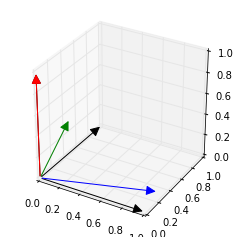

In [95]:
alt = math.pi/2. * 5./5.
az = math.pi/2. * 1/5
rot_plot(alt, az)

In [231]:
def P(alt, az): 
    "Matrice de passage"
    return np.array([[np.cos(az), np.sin(az), 0], [-np.sin(alt)*np.sin(az), np.sin(alt)*np.cos(az),  -np.cos(alt)], [-np.cos(alt)*np.sin(az), np.cos(alt)*np.cos(az), np.sin(alt)]])

In [243]:
P(alt, az) * np.array([1,0,0])

array([[  9.51056516e-01,   0.00000000e+00,   0.00000000e+00],
       [ -3.09016994e-01,   0.00000000e+00,  -0.00000000e+00],
       [ -1.89218337e-17,   0.00000000e+00,   0.00000000e+00]])

In [244]:
Pm = np.matrix(P(alt, az))

In [246]:
V = Pm * np.array([[1],[0],[0]])

In [247]:
np.linalg.norm(V)

0.99999999999999989

3.141592653589793